In [1]:
import pandas as pd
from sklearn.manifold import MDS
import matplotlib.pyplot as plt


Load the ice cream dataset

In [2]:
df = pd.read_csv("C:\\Users\\Bala Vignesh.A\\Desktop\\SCMA 632\\icecream.csv")

Calculate the dissimilarity matrix using Euclidean distance

In [3]:
from scipy.spatial.distance import pdist, squareform
dissimilarity_matrix = squareform(pdist(df.iloc[:, 1:], metric='euclidean'))

Apply MDS

In [4]:
mds = MDS(n_components=2, dissimilarity='precomputed')
coords = mds.fit_transform(dissimilarity_matrix)

C:\Users\Bala Vignesh.A\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Create a DataFrame with the MDS coordinates

In [5]:
mds_df = pd.DataFrame(coords, columns=['Dim1', 'Dim2'], index=df['Brand'])

Plot the MDS configuration

C:\Users\Bala Vignesh.A\AppData\Local\Temp\ipykernel_13500\3113101167.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(brand, (mds_df['Dim1'][i], mds_df['Dim2'][i]))


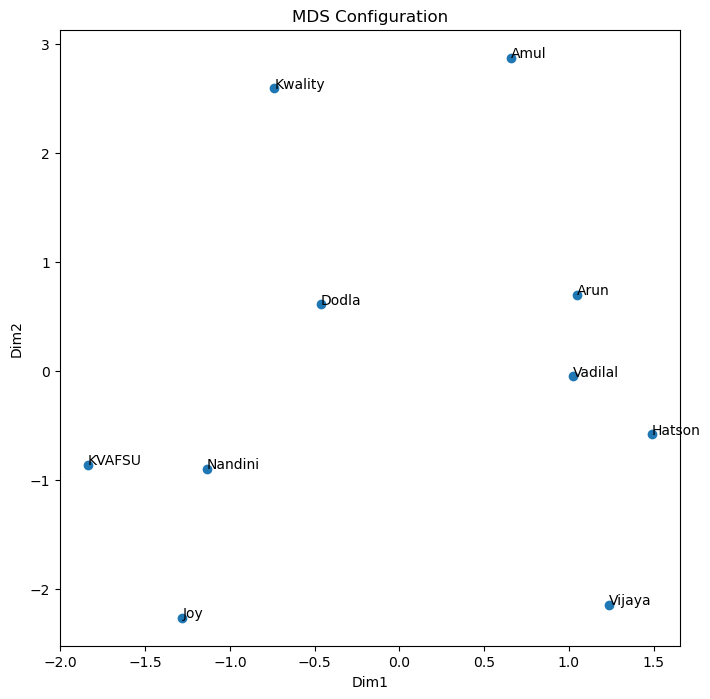

In [6]:
plt.figure(figsize=(8, 8))
plt.scatter(mds_df['Dim1'], mds_df['Dim2'])
for i, brand in enumerate(mds_df.index):
    plt.annotate(brand, (mds_df['Dim1'][i], mds_df['Dim2'][i]))
plt.xlabel('Dim1')
plt.ylabel('Dim2')
plt.title('MDS Configuration')
plt.show()

Interpret the results

In [7]:
print("MDS Configuration:")
print(mds_df)

MDS Configuration:
             Dim1      Dim2
Brand                      
Amul     0.659460  2.876275
Nandini -1.134603 -0.896596
Vadilal  1.023049 -0.045556
Vijaya   1.235250 -2.142342
Dodla   -0.464925  0.614876
Hatson   1.487560 -0.580568
Arun     1.049272  0.699705
Joy     -1.280116 -2.263110
Kwality -0.737499  2.596534
KVAFSU  -1.837447 -0.859218


Stress value

In [9]:
stress = mds.stress_
print("Stress value:", stress)

Stress value: 15.419100235449024
